<a href="https://colab.research.google.com/github/isadora-oa/imersao-dados-desafio-final/blob/main/Notebooks/Projeto_final_(pt_BR).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

![](https://i.pinimg.com/originals/10/40/21/104021b0cc341274872880ebaa39b788.png)

# **Introdução**
---

A ciência de maneira geral tem se desenvolvido cada vez mais rápido devido, principalmente, ao avanço tecnológico que proporciona automação e maior velocidade à diversos processos.
Todo esse avanço gera também grandes discussões sobre questões éticas envolvendo, inclusive, debates sobre a nossa saúde mental e física, porém este é um tema para outro projeto.

Outro problema, que pode ser solução, é como lidar com esta quantidade imensa de dados que são gerados, como processar, como tratar estes dados, é a partir desta necessidade que surge a Ciência de Dados (Data Science).

Este projeto, baseado no [desafio](https://www.kaggle.com/c/lish-moa) proposto pelo Laboratory Innovation Science at Harvard, fica evitente a necessidade de analisar uma base de dados de experimentos já realizados, sem a necessidade de ter que realizar diversos procedimentos laboratoriais reduzindo significativamente o tempo de descoberta de novos medicamentos/drogas ou de novas funções biológicas destes compostos, um exemplo mais recentemente é a utilização de Data Science na descoberta de vacinas, estudo de medicamentos e de curvas de contágio em combate a Covide-19.

Para este este projeto, portanto, foram utilizadas as bibliotecas de análises de dados [Pandas](https://pandas.pydata.org), [Matplotlib](https://matplotlib.org), [Seaborn](https://seaborn.pydata.org), [NumPy](https://numpy.org) e [Scikit-Learn](https://scikit-learn.org/stable/).

### ***Objetivos***

Este projeto tem como objetivo fazer a análise exploratória de uma base de dados (disponível [aqui](https://github.com/isadora-oa/imersao-dados-desafio-final/tree/main/Dados)) de resultados obtidos experimentalmente e desenvolver/explorar modelos de Machine Learning que possam auxiliar na descoberta de novos compostos para o desenvolvimento de novas drogas/medicamentos.

# **Seções**
---




1.   **Introdução**

2.   **Seções**

3.   **Base de Dados**

4.   **Análise dos Dados**

5.   **Machine Learning**

6.   **Conclusão**

7.   **Referências**




# **Base de Dados**

Para este projeto foram utilizados os dados abaixo, disponíveis na pasta [Dados](https://github.com/isadora-oa/imersao-dados-desafio-final/tree/main/Dados) deste repositório.

**Dados experimentais**

---
A coluna *id* representa as *culturas de células* utilizadas no(s) experimento(s), nas colunas *g* (gene) estão os dados de expressão gênica normalizados e nas colunas *c* (tipos celulares) estão os dados , também normalizados.

In [ ]:
# Dados experimentais

import pandas as pd
url_dados = 'https://github.com/isadora-oa/imersao-dados-desafio-final/blob/main/Dados/dados_experimentos.zip?raw=true'

# Como o link está em .zip os dados precisam ser descompactados:
dados = pd.read_csv(url_dados, compression = 'zip')

# Renomeando as colunas
mapa = {'droga': 'composto'}
dados.rename(columns=mapa, inplace=True)                #Substituição na base de dados
dados.columns = dados.columns.str.replace('-', '')      #Substitui na coluna o caracter que for especificado entre parênteses

print('Tabela 1.1: Dados experimentais.')
dados

Tabela 1.1: Dados experimentais.


,id,tratamento,tempo,dose,composto,g0,g1,g2,g3,g4,g5,g6,g7,g8,g9,g10,g11,g12,g13,g14,g15,g16,g17,g18,g19,g20,g21,g22,g23,g24,g25,g26,g27,g28,g29,g30,g31,g32,g33,g34,...,c60,c61,c62,c63,c64,c65,c66,c67,c68,c69,c70,c71,c72,c73,c74,c75,c76,c77,c78,c79,c80,c81,c82,c83,c84,c85,c86,c87,c88,c89,c90,c91,c92,c93,c94,c95,c96,c97,c98,c99
0,id_000644bb2,com_droga,24,D1,b68db1d53,1.0620,0.5577,-0.2479,-0.6208,-0.1944,-1.0120,-1.0220,-0.0326,0.5548,-0.0921,1.1830,0.1530,0.5574,-0.4015,0.1789,-0.6528,-0.7969,0.6342,0.1778,-0.3694,-0.5688,-1.1360,-1.1880,0.6940,0.4393,0.2664,0.1907,0.1628,-0.2853,0.5819,0.2934,-0.5584,-0.0916,-0.3010,-0.1537,...,0.4805,0.4965,0.3680,0.8427,0.1042,0.1403,0.1758,1.2570,-0.5979,1.2250,-0.0553,0.7351,0.5810,0.9590,0.2427,0.0495,0.4141,0.8432,0.6162,-0.7318,1.2120,0.6362,-0.4427,0.1288,1.4840,0.1799,0.5367,-0.1111,-1.0120,0.6685,0.2862,0.2584,0.8076,0.5523,-0.1912,0.6584,-0.3981,0.2139,0.3801,0.4176
1,id_000779bfc,com_droga,72,D1,df89a8e5a,0.0743,0.4087,0.2991,0.0604,1.0190,0.5207,0.2341,0.3372,-0.4047,0.8507,-1.1520,-0.4201,-0.0958,0.4590,0.0803,0.2250,0.5293,0.2839,-0.3494,0.2883,0.9449,-0.1646,-0.2657,-0.3372,0.3135,-0.4316,0.4773,0.2075,-0.4216,-0.1161,-0.0499,-0.2627,0.9959,-0.2483,0.2655,...,0.4083,0.0319,0.3905,0.7099,0.2912,0.4151,-0.2840,-0.3104,-0.6373,0.2887,-0.0765,0.2539,0.4443,0.5932,0.2031,0.7639,0.5499,-0.3322,-0.0977,0.4329,-0.2782,0.7827,0.5934,0.3402,0.1499,0.4420,0.9366,0.8193,-0.4236,0.3192,-0.4265,0.7543,0.4708,0.0230,0.2957,0.4899,0.1522,0.1241,0.6077,0.7371
2,id_000a6266a,com_droga,48,D1,18bb41b2c,0.6280,0.5817,1.5540,-0.0764,-0.0323,1.2390,0.1715,0.2155,0.0065,1.2300,-0.4797,-0.5631,-0.0366,-1.8300,0.6057,-0.3278,0.6042,-0.3075,-0.1147,-0.0570,-0.0799,-0.8181,-1.5320,0.2307,0.4901,0.4780,-1.3970,4.6240,-0.0437,1.2870,-1.8530,0.6069,0.4290,0.1783,0.0018,...,-0.5477,-0.7576,-0.0444,0.1894,-0.0014,-2.3640,-0.4682,0.1210,-0.5177,-0.0604,0.1682,-0.4436,0.4963,0.1363,0.3335,0.9760,-0.0427,-0.1235,0.0959,0.0690,-0.9416,-0.7548,-0.1109,-0.6272,0.3019,0.1172,0.1093,-0.3113,0.3019,-0.0873,-0.7250,-0.6297,0.6103,0.0223,-1.3240,-0.3174,-0.6417,-0.2187,-1.4080,0.6931
3,id_0015fd391,com_droga,48,D1,8c7f86626,-0.5138,-0.2491,-0.2656,0.5288,4.0620,-0.8095,-1.9590,0.1792,-0.1321,-1.0600,-0.8269,-0.3584,-0.8511,-0.5844,-2.5690,0.8183,-0.0532,-0.8554,0.1160,-2.3520,2.1200,-1.1580,-0.7191,-0.8004,-1.4670,-0.0107,-0.8995,0.2406,-0.2479,-1.0890,-0.7575,0.0881,-2.7370,0.8745,0.5787,...,-2.1220,-0.3752,-2.3820,-3.7350,-2.9740,-1.4930,-1.6600,-3.1660,0.2816,-0.2990,-1.1870,-0.5044,-1.7750,-1.6120,-0.9215,-1.0810,-3.0520,-3.4470,-2.7740,-1.8460,-0.5568,-3.3960,-2.9510,-1.1550,-3.2620,-1.5390,-2.4600,-0.9417,-1.5550,0.2431,-2.0990,-0.6441,-5.6300,-1.3780,-0.8632,-1.2880,-1.6210,-0.8784,-0.3876,-0.8154
4,id_001626bd3,com_droga,72,D2,7cbed3131,-0.3254,-0.4009,0.9700,0.6919,1.4180,-0.8244,-0.2800,-0.1498,-0.8789,0.8630,-0.2219,-0.5121,-0.9577,1.1750,0.2042,0.1970,0.1244,-1.7090,-0.3543,-0.5160,-0.3330,-0.2685,0.7649,0.2057,1.3720,0.6835,0.8056,-0.3754,-1.2090,0.2965,-0.0712,0.6389,0.6674,-0.0783,1.1740,...,-0.2274,0.3215,0.1535,-0.4640,-0.5943,0.3973,0.1500,0.5178,0.5159,0.6091,0.1813,-0.4249,0.7832,0.6529,0.5648,0.4817,0.0587,0.5303,0.6376,-0.3966,-1.4950,-0.9625,-0.0541,0.6273,0.4563,0.0698,0.8134,0.1924,0.6054,-0.1824,0.0042,0.0048,0.6670,1.0690,0.5523,-0.3031,0.1094,0.2885,-0.3786,0.7125
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23809,id_fffb1ceed,com_droga,24,D2,df1d0a5a1,0.1394,-0.0636,-0.1112,-0.5080,-0.4713,0.7201,0.5773,0.3055,-0.4726,0.1269,0.2531,0.1730,-0.4532,-1.0790,0.2474,-0.4550,0.3588,0.1600,-0.7362,-0.1103,0.8550,-0.4139,0.5541,0.2310,-0.5573,-0.4397,-0.9260,-0.2424,-0.6686,0.2326,0.6456,0.0136,-0.5141,-0.6320,0.7166,...

In [ ]:
# Informações sobre a estrutura da tabela 1.1:
dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23814 entries, 0 to 23813
Columns: 877 entries, id to c99
dtypes: float64(872), int64(1), object(4)
memory usage: 159.3+ MB


**Dados resultados**

---
Nas colunas estão os dados, para cada cultura de célula (*id*), sobre os *Mecanismos de Ação (moa)* para determinado alvo (proteínas, enzimas celulares do patógeno ou humana).

Para valores iguais à *0* os mecanismos de ação que não foram ativados e para valores iguais à *1* os mecaninsmos de ação que foram ativados, estas atribuições foram explicadas durante as aulas da imersão.

In [ ]:
# Dados dos resultados

dados_resultados = pd.read_csv('https://github.com/isadora-oa/imersao-dados-desafio-final/blob/main/Dados/dados_resultados.csv?raw=true')

print('Tabela 1.2: Dados resultados.')
dados_resultados

Tabela 1.2: Dados resultados.


,id,5-alpha_reductase_inhibitor,11-beta-hsd1_inhibitor,acat_inhibitor,acetylcholine_receptor_agonist,acetylcholine_receptor_antagonist,acetylcholinesterase_inhibitor,adenosine_receptor_agonist,adenosine_receptor_antagonist,adenylyl_cyclase_activator,adrenergic_receptor_agonist,adrenergic_receptor_antagonist,akt_inhibitor,aldehyde_dehydrogenase_inhibitor,alk_inhibitor,ampk_activator,analgesic,androgen_receptor_agonist,androgen_receptor_antagonist,anesthetic_-_local,angiogenesis_inhibitor,angiotensin_receptor_antagonist,anti-inflammatory,antiarrhythmic,antibiotic,anticonvulsant,antifungal,antihistamine,antimalarial,antioxidant,antiprotozoal,antiviral,apoptosis_stimulant,aromatase_inhibitor,atm_kinase_inhibitor,atp-sensitive_potassium_channel_antagonist,atp_synthase_inhibitor,atpase_inhibitor,atr_kinase_inhibitor,aurora_kinase_inhibitor,...,protein_synthesis_inhibitor,protein_tyrosine_kinase_inhibitor,radiopaque_medium,raf_inhibitor,ras_gtpase_inhibitor,retinoid_receptor_agonist,retinoid_receptor_antagonist,rho_associated_kinase_inhibitor,ribonucleoside_reductase_inhibitor,rna_polymerase_inhibitor,serotonin_receptor_agonist,serotonin_receptor_antagonist,serotonin_reuptake_inhibitor,sigma_receptor_agonist,sigma_receptor_antagonist,smoothened_receptor_antagonist,sodium_channel_inhibitor,sphingosine_receptor_agonist,src_inhibitor,steroid,syk_inhibitor,tachykinin_antagonist,tgf-beta_receptor_inhibitor,thrombin_inhibitor,thymidylate_synthase_inhibitor,tlr_agonist,tlr_antagonist,tnf_inhibitor,topoisomerase_inhibitor,transient_receptor_potential_channel_antagonist,tropomyosin_receptor_kinase_inhibitor,trpv_agonist,trpv_antagonist,tubulin_inhibitor,tyrosine_kinase_inhibitor,ubiquitin_specific_protease_inhibitor,vegfr_inhibitor,vitamin_b,vitamin_d_receptor_agonist,wnt_inhibitor
0,id_000644bb2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,id_000779bfc,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,id_000a6266a,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,id_0015fd391,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,id_001626bd3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23809,id_fffb1ceed,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
23810,id_fffb70c0c,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
23811,id_fffc1c3f4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
23812,id_fffcb9e7c,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [ ]:
# Informações sobre a estrututra da tabela 1.2:
dados_resultados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23814 entries, 0 to 23813
Columns: 207 entries, id to wnt_inhibitor
dtypes: int64(206), object(1)
memory usage: 37.6+ MB


# **Análise dos Dados**
---


In [ ]:
# Dados estatíscticos gerais da tabela 1.1:
print(dados.describe())

print('mean: Média')
print('std: Desvio Padrão')
print('min, 25%, 50%, 75% e max: Referentes ao gráfico tipo Boxplot')

              tempo            g0  ...           c98           c99
count  23814.000000  23814.000000  ...  23814.000000  23814.000000
mean      48.020156      0.248366  ...     -0.470252     -0.301505
std       19.402807      1.393399  ...      1.834828      1.407918
min       24.000000     -5.513000  ...    -10.000000    -10.000000
25%       24.000000     -0.473075  ...     -0.592600     -0.562900
50%       48.000000     -0.008850  ...      0.014000     -0.019500
75%       72.000000      0.525700  ...      0.461275      0.438650
max       72.000000     10.000000  ...      3.111000      3.805000

[8 rows x 873 columns]
mean: Média
std: Desvio Padrão
min, 25%, 50%, 75% e max: Referentes ao gráfico tipo Boxplot


Inicialmente se avaliou as informações contidas em cada coluna da tabela 1.1, dos **dados experimentais**, tais como quantidade e tipo de dados, utilizando os comandos `value_counts()` e `unique()`/`nunique()`.

In [ ]:
# Coluna tratamento

print('Array:' , dados['tratamento'].unique())  #Imprime os tipos de dados contidos na respectiva coluna
print(dados['tratamento'].value_counts())

print('Quantidades respectivas em porcentagem %:')
print(dados['tratamento'].value_counts(normalize=True)*100)

Array: ['com_droga' 'com_controle']
com_droga       21948
com_controle     1866
Name: tratamento, dtype: int64
Quantidades respectivas em porcentagem %:
com_droga       92.164273
com_controle     7.835727
Name: tratamento, dtype: float64


In [ ]:
# Coluna tempo

print(dados['tempo'].value_counts())
print('Quantidades respectivas em porcentagem %:')
print(dados['tempo'].value_counts(normalize=True)*100)

48    8250
72    7792
24    7772
Name: tempo, dtype: int64
Quantidades respectivas em porcentagem %:
48    34.643487
72    32.720249
24    32.636264
Name: tempo, dtype: float64


In [ ]:
# Coluna dose

print(dados['dose'].value_counts())
print('Quantidades respectivas em porcentagem %:')
print(dados['dose'].value_counts(normalize=True)*100)

D1    12147
D2    11667
Name: dose, dtype: int64
Quantidades respectivas em porcentagem %:
D1    51.007811
D2    48.992189
Name: dose, dtype: float64


In [ ]:
# Coluna compostos

print('Quantidade de compostos: ', dados['composto'].nunique(),'diferentes compostos')
print(dados['composto'].value_counts())

Quantidade de compostos:  3289 diferentes compostos
cacb2b860    1866
87d714366     718
9f80f3f77     246
8b87a7a83     203
5628cb3ee     202
             ... 
a8ec8311e       1
19b95658c       1
809527b9d       1
1d39c75d6       1
c7e535136       1
Name: composto, Length: 3289, dtype: int64


O gráfico abaixo representa os compostos mais frequentes nesta base de dados.

Gráfico 1: Compostos mais relevantes.


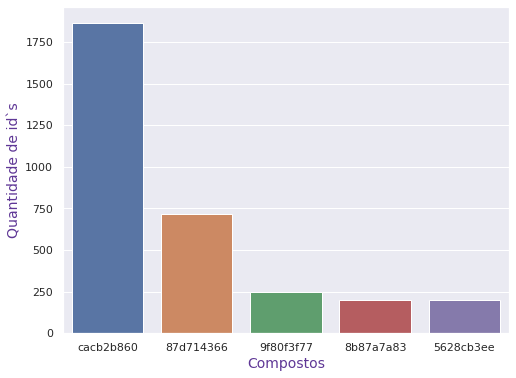

In [ ]:
print('Gráfico 1: Compostos mais relevantes.')

import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
plt.figure(figsize=(8, 6))

#Preparação dos dados:
cod_compostos = dados['composto'].value_counts().index[0:5]
data = dados.query('composto in @cod_compostos')

#Contabiliza e seleciona os tipos de elementos de determinada coluna utilizando uma query:
ax = sns.countplot(x = 'composto' , data=data , order=cod_compostos)
ax.set_xlabel('Compostos', fontsize=14 , color='#5f3796')
ax.set_ylabel('Quantidade de id`s', fontsize=14 , color='#5f3796')

plt.show()

De acordo com os dados, portanto, sabemos que existem dois tipos de tratamento para este conjunto de dados: *com_controle* (placebo) e *com_droga*, que está relacionada com a coluna *composto*; e duas dosagens diferentes: *D1* e *D2*.
Na coluna *tempo* são três tipos de dados: *24*, *48* e *72* horas com porcentagens muito próximas de ocorrência.

Em seguida foram analisados histogramas, ainda relacionadas aos dados da tabela 1.1.

In [ ]:
# Dados estatísticos para as colunas g, genes. Com estes dados os gráficos abaixo (1.1, 1.2 e 1.3) serão plotados.

print('Tabela 2.1: Dados estatísticos das colunas g.')
dados.loc[:, 'g0':'g771'].describe().T
#                   |Número total de genes, informado durante as aulas.

Tabela 2.1: Dados estatísticos das colunas g.


,count,mean,std,min,25%,50%,75%,max
g0,23814.0,0.248366,1.393399,-5.513,-0.473075,-0.00885,0.525700,10.000
g1,23814.0,-0.095684,0.812363,-5.737,-0.562200,-0.04660,0.403075,5.039
g2,23814.0,0.152253,1.035731,-9.104,-0.437750,0.07520,0.663925,8.257
g3,23814.0,0.081971,0.950012,-5.998,-0.429575,0.00805,0.463400,10.000
g4,23814.0,0.057347,1.032091,-6.369,-0.470925,-0.02690,0.465375,10.000
...,...,...,...,...,...,...,...,...
g767,23814.0,-0.076251,1.115477,-10.000,-0.506200,0.00990,0.511175,6.317
g768,23814.0,0.134162,0.951264,-4.269,-0.353100,0.00540,0.409075,10.000
g769,23814.0,-0.128018,1.230636,-10.000,-0.544600,0.00060,0.498500,5.911
g770,23814.0,-0.219210,1.326193,-10.000,-0.554400,0.02870,0.496400,10.000


Histograma 1.1: Média para as colunas g (genes).


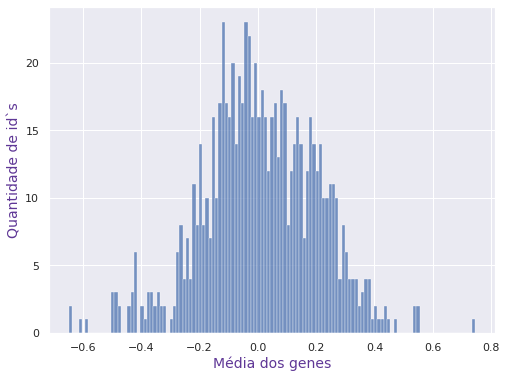

In [ ]:
print('Histograma 1.1: Média para as colunas g (genes).')

plt.figure(figsize=(8,6))
ax = sns.histplot(data=dados.loc[:, 'g0':'g771'].describe().T['mean'] , bins=125)

ax.set_xlabel('Média dos genes' , fontsize=14 , color='#5f3796')
ax.set_ylabel('Quantidade de id`s' , fontsize=14 , color='#5f3796')

plt.show()

Histograma 1.2: Máximo para as colunas g (genes).


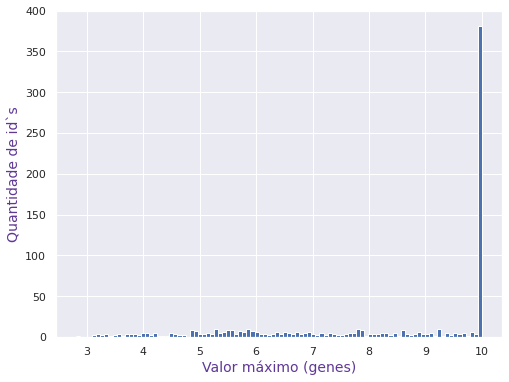

In [ ]:
print('Histograma 1.2: Máximo para as colunas g (genes).')

plt.figure(figsize=(8,6))
ax = dados.loc[:, 'g0':'g771'].describe().T['max'].hist(bins=100)

ax.set_xlabel('Valor máximo (genes)' , fontsize=14 , color='#5f3796')
ax.set_ylabel('Quantidade de id`s' , fontsize=14 , color='#5f3796')

plt.show()

Histograma 1.3: Mínimo para as colunas g (genes).


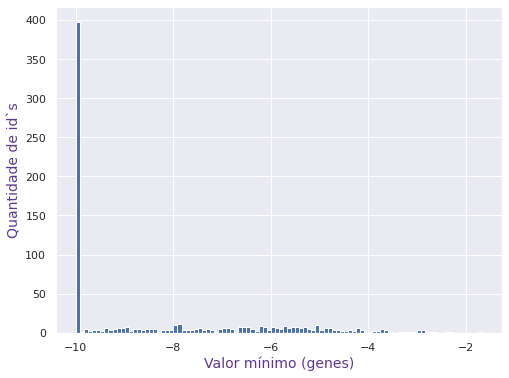

In [ ]:
print('Histograma 1.3: Mínimo para as colunas g (genes).')

plt.figure(figsize=(8,6))
ax = dados.loc[:, 'g0':'g771'].describe().T['min'].hist(bins=100)

ax.set_xlabel('Valor mínimo (genes)' , fontsize=14 , color='#5f3796')
ax.set_ylabel('Quantidade de id`s' , fontsize=14 , color='#5f3796')

plt.show()

In [ ]:
# O mesmo foi feito para as colunas c, tipos celulares:

print('Tabela 2.2: Dados estatísticos das colunas c.')
dados.loc[:, 'c0':'c99'].describe().T
#                   |Número total de tipos celulares, também informado durante as aulas.

Tabela 2.2: Dados estatísticos das colunas c.


,count,mean,std,min,25%,50%,75%,max
c0,23814.0,-0.355156,1.752565,-10.0,-0.549300,-0.00900,0.448975,3.365
c1,23814.0,-0.455359,2.004962,-10.0,-0.538425,0.00980,0.476875,3.915
c2,23814.0,-0.480542,2.039346,-10.0,-0.550375,-0.00400,0.460575,2.970
c3,23814.0,-0.377666,1.554583,-10.0,-0.601975,-0.03905,0.413100,2.408
c4,23814.0,-0.493552,2.091888,-10.0,-0.559975,0.01140,0.470300,4.555
...,...,...,...,...,...,...,...,...
c95,23814.0,-0.353726,1.629291,-10.0,-0.567975,-0.01025,0.444750,2.814
c96,23814.0,-0.463485,2.059725,-10.0,-0.552575,-0.00125,0.465225,3.505
c97,23814.0,-0.378241,1.703615,-10.0,-0.561000,-0.00680,0.446400,2.924
c98,23814.0,-0.470252,1.834828,-10.0,-0.592600,0.01400,0.461275,3.111


Histograma 2.1: Média para as colunas c (tipos celulares).


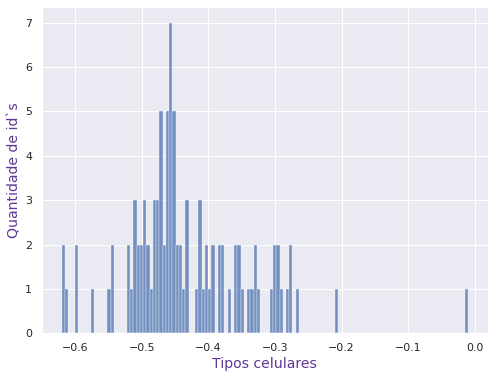

In [ ]:
print('Histograma 2.1: Média para as colunas c (tipos celulares).')

plt.figure(figsize=(8,6))
ax = sns.histplot(data=dados.loc[:, 'c0':'c99'].describe().T['mean'] , bins=125)

ax.set_xlabel('Tipos celulares' , fontsize=14 , color='#5f3796')
ax.set_ylabel('Quantidade de id`s' , fontsize=14 , color='#5f3796')

plt.show()

Histograma 2.2: Máximo para as colunas c (tipos celulares).


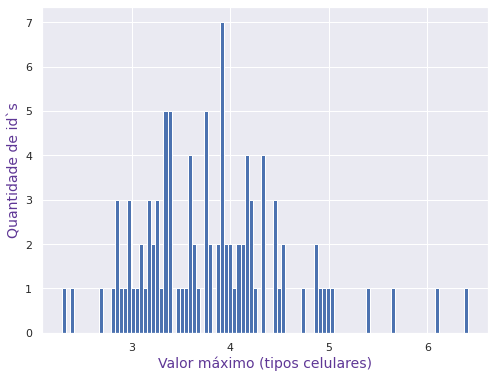

In [ ]:
print('Histograma 2.2: Máximo para as colunas c (tipos celulares).')

plt.figure(figsize=(8,6))
ax = dados.loc[:, 'c0':'c99'].describe().T['max'].hist(bins=100)

ax.set_xlabel('Valor máximo (tipos celulares)' , fontsize=14 , color='#5f3796')
ax.set_ylabel('Quantidade de id`s' , fontsize=14 , color='#5f3796')

plt.show()

Histograma 2.3: Mínimo para as colunas c (tipos celulares).


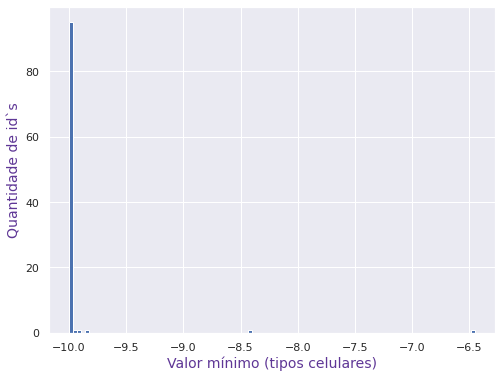

In [ ]:
print('Histograma 2.3: Mínimo para as colunas c (tipos celulares).')

plt.figure(figsize=(8,6))
ax = dados.loc[:, 'c0':'c99'].describe().T['min'].hist(bins=100)

ax.set_xlabel('Valor mínimo (tipos celulares)' , fontsize=14 , color='#5f3796')
ax.set_ylabel('Quantidade de id`s' , fontsize=14 , color='#5f3796')

plt.show()

Observamos também que os gráficos boxplots podem ser muito úteis para fazer análises comparando dois ou mais parâmetros de determinado gene ou tipo celular, como será descrito a seguir.

Boxplot 1.1: Média para a gene g0


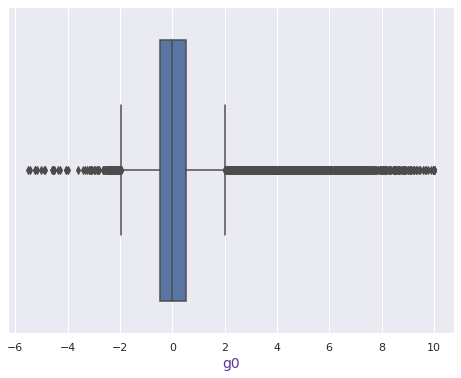

In [ ]:
print('Boxplot 1.1: Média para a gene g0')

plt.figure(figsize=(8, 6))
plt.xlabel('', fontsize=14 , color='#5f3796')

sns.boxplot(x='g0' , data=dados)

plt.show()

Boxplot 1.2: Comparativo de tratamento para o gene g0


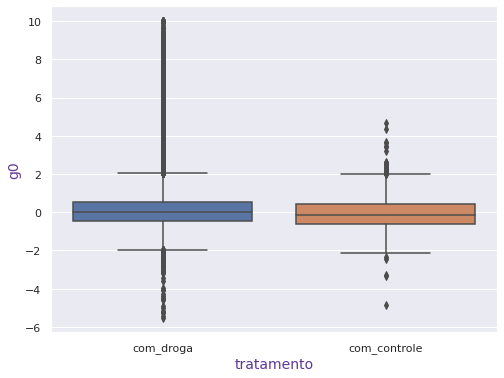

In [ ]:
print('Boxplot 1.2: Comparativo de tratamento para o gene g0')

plt.figure(figsize=(8, 6))
plt.xlabel('', fontsize=14, color='#5f3796')
plt.ylabel('', fontsize=14, color='#5f3796')

sns.boxplot(y='g0', x='tratamento', data=dados)

plt.show()

Boxplot 1.3: Comparativo de tempo para o gene g0


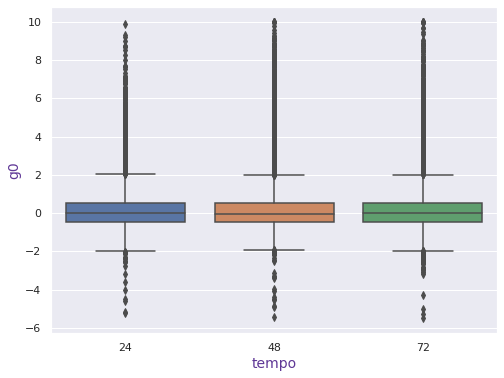

In [ ]:
print('Boxplot 1.3: Comparativo de tempo para o gene g0')

plt.figure(figsize=(8, 6))
plt.xlabel('', fontsize=14, color='#5f3796')
plt.ylabel('', fontsize=14, color='#5f3796')

sns.boxplot(y='g0' , x='tempo' , data=dados)

plt.show()

Boxplot 1.4: Comparativo de dose para o gene g0


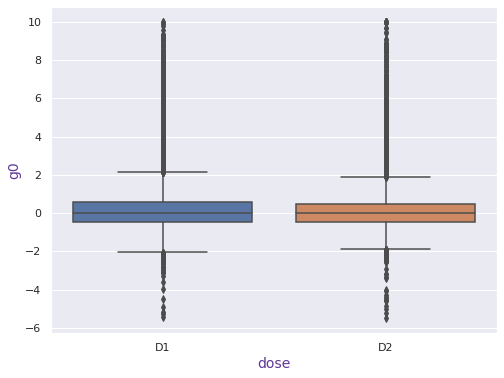

In [ ]:
print('Boxplot 1.4: Comparativo de dose para o gene g0')

plt.figure(figsize=(8, 6))
plt.xlabel('', fontsize=14, color='#5f3796')
plt.ylabel('', fontsize=14, color='#5f3796')

sns.boxplot(y='g0' , x='dose' , data=dados)

plt.show()

**Correlação entre os dados** 

---
Também foram analisadas as correlações entre os dados das colunas g e c, de genes e tipos celulares, como descrito abaixo.

Foram plotados gráficos de matriz de correlação diagonal (código do modelo disponível [aqui](https://seaborn.pydata.org/examples/many_pairwise_correlations.html)) e os valores correspondem às respectivas tabelas, abaixo. Sendo que:

*   Valores próximos de -1 ou +1 indicam variáveis altamente correlacionadas;
*   Valores próximos de 0 indicam variáveis não corrrelacionadas;
*   Quando os valores são negativos (próximos de -1) as variáveis são inversamente correlacionadas, ou seja, enquanto uma aumenta a outra diminui proporcionalmente;
*   Quando os valores são positivos (próximos de +1) as variáveis são diretamente correlacionadas, ou seja, ambas diminuem/aumentam proporcionalmente;

In [ ]:
# Correlação de todos os parâmetros (tratamento, tempo, composto e dose) dos genes:

print('Tabela 3.1: Correlação entre as colunas g.')
dados.loc[:, 'g0':'g771'].corr()

Tabela 3.1: Correlação entre as colunas g.


,g0,g1,g2,g3,g4,g5,g6,g7,g8,g9,g10,g11,g12,g13,g14,g15,g16,g17,g18,g19,g20,g21,g22,g23,g24,g25,g26,g27,g28,g29,g30,g31,g32,g33,g34,g35,g36,g37,g38,g39,...,g732,g733,g734,g735,g736,g737,g738,g739,g740,g741,g742,g743,g744,g745,g746,g747,g748,g749,g750,g751,g752,g753,g754,g755,g756,g757,g758,g759,g760,g761,g762,g763,g764,g765,g766,g767,g768,g769,g770,g771
g0,1.000000,0.086032,0.176188,0.011266,0.403153,-0.165478,0.238348,-0.374451,-0.604212,-0.428779,-0.547606,0.219762,-0.199453,0.472223,-0.346179,-0.201323,-0.513026,-0.433536,-0.002073,-0.074622,-0.468599,0.052445,0.022269,-0.076298,-0.337522,-0.235191,-0.422814,0.148432,-0.471092,-0.296871,-0.528327,0.558136,-0.133229,-0.155987,-0.120247,0.327593,-0.147800,-0.591868,0.602623,0.450769,...,0.365095,-0.528006,0.295970,0.067108,-0.250243,-0.110665,-0.214344,-0.280492,-0.036098,-0.128288,-0.498922,-0.469595,0.673664,0.538050,0.297528,0.066530,0.240252,-0.170949,0.485924,-0.093815,0.397476,0.017923,0.321260,-0.131709,-0.133430,0.178220,0.201902,-0.205648,-0.676835,-0.433554,0.005085,-0.239410,0.548401,0.425222,-0.308095,-0.052622,0.300241,-0.127375,-0.514201,0.405908
g1,0.086032,1.000000,-0.054518,-0.027855,0.193647,-0.151590,-0.122541,0.144537,-0.009973,-0.047558,-0.009051,0.161274,0.037178,-0.009256,0.002632,-0.070193,-0.063414,-0.000944,-0.023748,-0.034714,-0.131031,0.196596,-0.061441,0.090620,-0.004299,-0.032600,-0.019435,0.015661,-0.098907,-0.091071,-0.053331,-0.049514,0.187382,-0.091232,0.045417,0.044373,-0.077671,-0.005265,-0.042213,0.050546,...,-0.015556,-0.017184,0.043104,-0.189662,-0.050194,-0.007878,-0.083539,-0.042175,0.014307,-0.134166,-0.026985,0.088382,-0.077453,0.015545,-0.027527,-0.071078,-0.095445,0.049612,-0.040518,-0.074277,-0.022356,0.125763,-0.082779,0.020292,-0.023171,-0.207192,-0.066570,-0.057007,0.002062,0.029795,-0.205998,0.060051,0.115071,0.160140,0.015098,-0.003378,-0.030756,-0.006866,-0.095108,-0.032233
g2,0.176188,-0.054518,1.000000,0.042633,0.013968,0.018516,0.015190,-0.144205,-0.128029,-0.081332,-0.105050,0.011198,-0.063501,0.082011,-0.082204,-0.059607,-0.137811,-0.085491,0.053335,0.028813,-0.061160,-0.129131,-0.007426,-0.034230,-0.128312,-0.067363,-0.126554,0.036984,-0.129481,-0.017941,-0.152288,0.172191,-0.100086,-0.033010,-0.015481,0.001098,-0.020374,-0.157977,0.169464,0.144449,...,0.089525,-0.140916,0.008587,0.042106,-0.018846,-0.008093,-0.074404,-0.080120,-0.020085,-0.028099,-0.098775,-0.113000,0.175916,0.119166,0.071051,0.025358,0.078971,-0.086326,0.149456,0.033432,0.124239,-0.006327,0.120148,-0.041162,-0.030040,0.048549,0.096369,0.000494,-0.172627,-0.130200,0.090115,-0.055655,0.138085,0.061574,-0.093631,-0.053149,0.115415,0.014489,-0.078661,0.103985
g3,0.011266,-0.027855,0.042633,1.000000,-0.033039,0.042231,-0.043177,-0.175692,-0.086167,-0.014052,-0.074101,0.181024,0.030539,0.192727,0.128792,-0.045688,0.033974,-0.070920,0.237669,0.112392,0.027867,-0.167263,0.197013,-0.049480,-0.113336,0.175615,0.111355,0.007168,-0.022381,-0.128269,-0.042827,0.098416,-0.091962,-0.083806,0.184985,-0.070933,-0.317859,-0.228039,0.084346,0.054827,...,0.039519,0.000851,0.011655,-0.116724,0.304819,-0.087159,-0.134135,-0.031211,0.174116,0.060289,-0.119276,-0.140391,0.110547,0.145925,0.155011,0.049182,-0.007754,-0.128488,0.078139,0.012422,0.040728,0.164467,0.171886,-0.069777,0.066560,0.102111,-0.036922,0.111994,-0.133740,-0.226928,0.075982,0.178422,0.016467,-0.089317,-0.166426,-0.179370,0.028452,-0.206077,-0.002142,0.058219
g4,0.403153,0.193647,0.013968,-0.033039,1.000000,-0.057449,0.206405,-0.032748,-0.474828,-0.274167,-0.458021,0.116467,-0.207078,0.210440,-0.307280,0.019531,-0.275700,-0.422889,-0.012207,-0.088152,-0.311798,0.286106,-0.055368,-0.113396,-0.120743,-0.233682,-0.340708,0.070292,-0.360274,-0.225461,-0.402256,0.324362,0.091731,-0.052787,-0.073490,0.195062,-0.124394,-0.277002,0.285256,0.300517,...,0.215930,-0.292602,-0.008241,-0.005070,-0.284391,-0.116918,-0.252399,-0.250280,0.000141,-0.172896,-0.324769,-0.291644,0.302912,0.222951,0.144028,-0.020950,0.129354,-

Gráfico 2.1: Matriz de correlação diagonal colunas g.


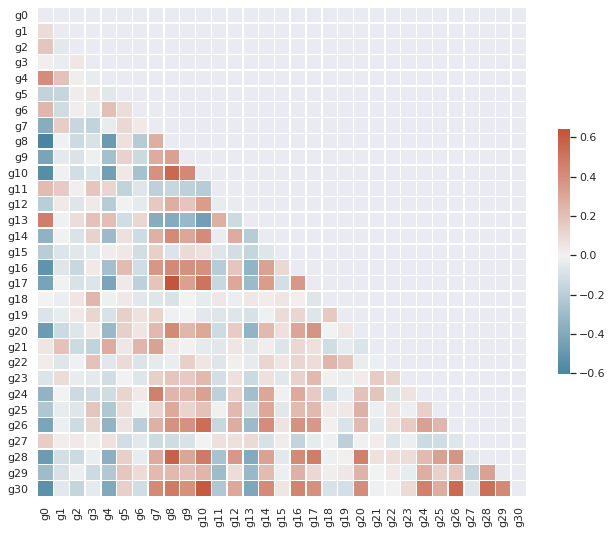

In [ ]:
import numpy as np

corr = dados.loc[:, 'g0': 'g30'].corr()
# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))
# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))
# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)
# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, center=0, #vmax=.3,(alteração relacionada com a escala do gráfico)
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

print('Gráfico 2.1: Matriz de correlação diagonal colunas g.')
plt.show()

In [ ]:
# Correlação de todos os parâmetros (tratamento, tempo, composto e dose) dos tipos celulares:

print('Tabela 3.2: Correlação entre as colunas c.')
dados.loc[:, 'c0':'c99'].corr()

Tabela 3.2: Correlação entre as colunas c.


,c0,c1,c2,c3,c4,c5,c6,c7,c8,c9,c10,c11,c12,c13,c14,c15,c16,c17,c18,c19,c20,c21,c22,c23,c24,c25,c26,c27,c28,c29,c30,c31,c32,c33,c34,c35,c36,c37,c38,c39,...,c60,c61,c62,c63,c64,c65,c66,c67,c68,c69,c70,c71,c72,c73,c74,c75,c76,c77,c78,c79,c80,c81,c82,c83,c84,c85,c86,c87,c88,c89,c90,c91,c92,c93,c94,c95,c96,c97,c98,c99
c0,1.000000,0.827336,0.848472,0.798830,0.840695,0.844469,0.811946,0.793171,0.842977,0.759971,0.850533,0.832837,0.808033,0.836838,0.823716,0.827496,0.788947,0.831436,0.797051,0.796719,0.818420,0.823586,0.717807,0.805687,0.836447,0.837448,0.815484,0.840909,0.824231,0.807981,0.818558,0.855363,0.831066,0.820803,0.828947,0.829693,0.839386,0.774960,0.806885,0.849807,...,0.839605,0.846656,0.851796,0.797634,0.820904,0.806811,0.845954,0.825661,0.833020,0.812924,0.814969,0.837019,0.845174,0.847267,0.723442,0.845666,0.761470,0.791360,0.840550,0.812687,0.839668,0.825544,0.844675,0.852891,0.836344,0.859314,0.817635,0.787650,0.838987,0.827124,0.835217,0.832529,0.799196,0.817657,0.846457,0.815499,0.845579,0.834513,0.800682,0.777426
c1,0.827336,1.000000,0.901416,0.808364,0.879258,0.869569,0.876924,0.793199,0.879892,0.812345,0.866297,0.884532,0.861089,0.880177,0.820911,0.857797,0.771984,0.843076,0.861134,0.820399,0.837626,0.852621,0.756086,0.812062,0.874647,0.829208,0.887230,0.853246,0.861559,0.789314,0.816042,0.889619,0.837788,0.866130,0.865169,0.840517,0.877007,0.779697,0.890506,0.835689,...,0.875778,0.823214,0.889565,0.868589,0.840502,0.856425,0.869802,0.886129,0.834581,0.814084,0.869416,0.826417,0.861290,0.851737,0.725885,0.884601,0.830345,0.846593,0.837897,0.844521,0.842983,0.885487,0.868565,0.870559,0.875755,0.874084,0.818480,0.793513,0.838070,0.811761,0.875405,0.839236,0.876519,0.868431,0.886750,0.803637,0.871383,0.866084,0.815952,0.781510
c2,0.848472,0.901416,1.000000,0.830759,0.909991,0.882794,0.898819,0.812980,0.896087,0.821522,0.892033,0.904968,0.879638,0.910497,0.841421,0.884464,0.800587,0.879281,0.881011,0.824149,0.853648,0.878793,0.761439,0.832908,0.887800,0.859023,0.899897,0.879307,0.876141,0.824171,0.851934,0.906052,0.850681,0.890263,0.880173,0.852595,0.887820,0.799599,0.905449,0.866557,...,0.897347,0.848344,0.898224,0.887169,0.853978,0.874032,0.894848,0.892008,0.857836,0.838323,0.877652,0.849427,0.891245,0.890797,0.738358,0.892939,0.832679,0.858314,0.866675,0.858469,0.871477,0.899199,0.892636,0.887700,0.896144,0.891606,0.844756,0.800533,0.853413,0.835940,0.902964,0.872660,0.883866,0.885419,0.906584,0.837420,0.898270,0.874869,0.839640,0.802032
c3,0.798830,0.808364,0.830759,1.000000,0.831523,0.829550,0.805506,0.752940,0.830369,0.765626,0.818465,0.828218,0.803839,0.822104,0.788432,0.818493,0.758345,0.804018,0.806834,0.781198,0.791121,0.816744,0.742109,0.792355,0.828853,0.829277,0.807726,0.816247,0.818892,0.790481,0.796522,0.830602,0.796222,0.804081,0.811296,0.805880,0.820989,0.747433,0.813351,0.827805,...,0.810208,0.797311,0.835446,0.817884,0.810944,0.788175,0.835219,0.813661,0.805820,0.794756,0.782965,0.806491,0.840010,0.824398,0.702892,0.823897,0.765937,0.802952,0.800673,0.803913,0.813930,0.835707,0.819130,0.813694,0.834414,0.819223,0.808987,0.772220,0.811936,0.796889,0.825342,0.813555,0.812200,0.803603,0.830301,0.799760,0.822001,0.814889,0.779998,0.768872
c4,0.840695,0.879258,0.909991,0.831523,1.000000,0.883526,0.893285,0.808096,0.888384,0.822614,0.890057,0.904082,0.870384,0.911130,0.839991,0.879147,0.779366,0.879616,0.893702,0.807685,0.833680,0.885335,0.768383,0.854108,0.872477,0.872339,0.900002,0.869316,0.875701,0.808720,0.851560,0.901149,0.836846,0.891190,0.865017,0.851393,0.887747,0.792168,0.900725,0.870204,...,0.885975,0.837735,0.888442,0.900435,0.839403,0.862301,0.903555,0.885107,0.860831,0.835481,0.859855,0.850158,0.881167,0.893576,0.740225,0.882419,0.847703,0.847125,0.856590,0.862995,0.862491,0.903756,0.902625,0.879256,0.893951,0.882537,0.839999,0.779533,0.843129,0.816772,0.895967,0.890255,0.882185,0.868684,0.900309,0.839111,0.901603,0.873534,0.834823,0.795218
...,...,...,...,...,...,...,...,...,...,...,...,..

Gráfico 2.2: Matriz de correlação diagonal colunas c.


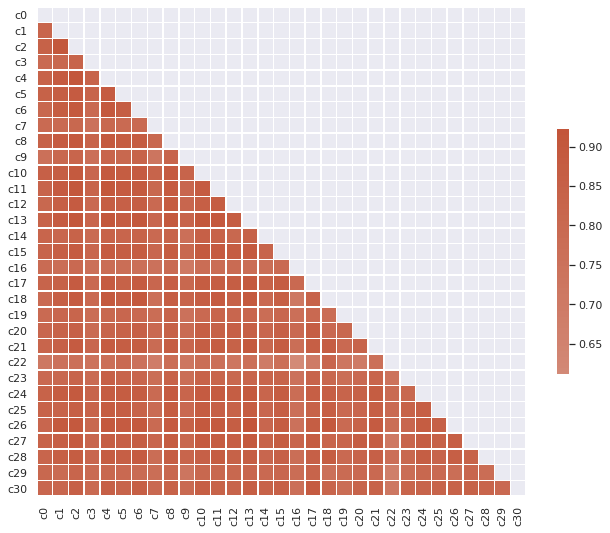

In [ ]:
corr = dados.loc[:, 'c0': 'c30'].corr()  #Seleciona quais dados plotar no gráfico
mask = np.triu(np.ones_like(corr, dtype=bool))
f, ax = plt.subplots(figsize=(11, 9))
cmap = sns.diverging_palette(230, 20, as_cmap=True)
sns.heatmap(corr, mask=mask, cmap=cmap, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

print('Gráfico 2.2: Matriz de correlação diagonal colunas c.')
plt.show()

In [ ]:
# Correlação de todos os parâmetros (tratamento, tempo, composto e dose) dos genes e dos tipos celulares:

corr_gc = dados.loc[:,'g0':'c99'].corr()
print('Tabela 3.3: Correlação entre as colunas g e c.')
corr_gc

Tabela 3.3: Correlação entre as colunas g e c.


,g0,g1,g2,g3,g4,g5,g6,g7,g8,g9,g10,g11,g12,g13,g14,g15,g16,g17,g18,g19,g20,g21,g22,g23,g24,g25,g26,g27,g28,g29,g30,g31,g32,g33,g34,g35,g36,g37,g38,g39,...,c60,c61,c62,c63,c64,c65,c66,c67,c68,c69,c70,c71,c72,c73,c74,c75,c76,c77,c78,c79,c80,c81,c82,c83,c84,c85,c86,c87,c88,c89,c90,c91,c92,c93,c94,c95,c96,c97,c98,c99
g0,1.000000,0.086032,0.176188,0.011266,0.403153,-0.165478,0.238348,-0.374451,-0.604212,-0.428779,-0.547606,0.219762,-0.199453,0.472223,-0.346179,-0.201323,-0.513026,-0.433536,-0.002073,-0.074622,-0.468599,0.052445,0.022269,-0.076298,-0.337522,-0.235191,-0.422814,0.148432,-0.471092,-0.296871,-0.528327,0.558136,-0.133229,-0.155987,-0.120247,0.327593,-0.147800,-0.591868,0.602623,0.450769,...,-0.662186,-0.639153,-0.665249,-0.604982,-0.621192,-0.646914,-0.630096,-0.625521,-0.643556,-0.622139,-0.655613,-0.637361,-0.669361,-0.666255,-0.541994,-0.660842,-0.540702,-0.647280,-0.670072,-0.592806,-0.644508,-0.577032,-0.621314,-0.673295,-0.588529,-0.660818,-0.625025,-0.625130,-0.627185,-0.682893,-0.648726,-0.629025,-0.633479,-0.668520,-0.656116,-0.600758,-0.646784,-0.622840,-0.640484,-0.609238
g1,0.086032,1.000000,-0.054518,-0.027855,0.193647,-0.151590,-0.122541,0.144537,-0.009973,-0.047558,-0.009051,0.161274,0.037178,-0.009256,0.002632,-0.070193,-0.063414,-0.000944,-0.023748,-0.034714,-0.131031,0.196596,-0.061441,0.090620,-0.004299,-0.032600,-0.019435,0.015661,-0.098907,-0.091071,-0.053331,-0.049514,0.187382,-0.091232,0.045417,0.044373,-0.077671,-0.005265,-0.042213,0.050546,...,-0.040883,-0.027389,-0.013518,-0.005513,0.004970,0.000605,0.005983,-0.025452,-0.014658,-0.016301,-0.035473,0.004021,-0.041172,-0.023066,0.004179,-0.020136,0.023721,-0.003363,-0.044079,0.006385,-0.004805,-0.010185,0.002633,-0.022321,-0.018388,-0.020843,-0.016555,0.011173,-0.037424,-0.008322,-0.034557,-0.000934,-0.022478,-0.034891,-0.042638,-0.011237,-0.022127,-0.008487,-0.002824,-0.002308
g2,0.176188,-0.054518,1.000000,0.042633,0.013968,0.018516,0.015190,-0.144205,-0.128029,-0.081332,-0.105050,0.011198,-0.063501,0.082011,-0.082204,-0.059607,-0.137811,-0.085491,0.053335,0.028813,-0.061160,-0.129131,-0.007426,-0.034230,-0.128312,-0.067363,-0.126554,0.036984,-0.129481,-0.017941,-0.152288,0.172191,-0.100086,-0.033010,-0.015481,0.001098,-0.020374,-0.157977,0.169464,0.144449,...,-0.179885,-0.183319,-0.185323,-0.174439,-0.163617,-0.174381,-0.185913,-0.166461,-0.181092,-0.167242,-0.180925,-0.178400,-0.175939,-0.182079,-0.151960,-0.183145,-0.181286,-0.159720,-0.179919,-0.162542,-0.183613,-0.170641,-0.186154,-0.177631,-0.166103,-0.187158,-0.157164,-0.170382,-0.164975,-0.174041,-0.183325,-0.186048,-0.166786,-0.190383,-0.178312,-0.158105,-0.182540,-0.178812,-0.170152,-0.172124
g3,0.011266,-0.027855,0.042633,1.000000,-0.033039,0.042231,-0.043177,-0.175692,-0.086167,-0.014052,-0.074101,0.181024,0.030539,0.192727,0.128792,-0.045688,0.033974,-0.070920,0.237669,0.112392,0.027867,-0.167263,0.197013,-0.049480,-0.113336,0.175615,0.111355,0.007168,-0.022381,-0.128269,-0.042827,0.098416,-0.091962,-0.083806,0.184985,-0.070933,-0.317859,-0.228039,0.084346,0.054827,...,-0.115228,-0.037189,-0.077496,-0.060176,-0.026180,-0.099132,-0.026693,-0.060265,-0.036769,-0.045193,-0.140946,-0.026295,-0.076285,-0.055792,-0.035812,-0.078715,-0.050296,-0.071568,-0.078478,-0.046407,-0.033641,-0.064704,-0.044155,-0.083462,-0.028035,-0.063797,-0.039701,0.010285,-0.047301,-0.066781,-0.091892,-0.045385,-0.089801,-0.089818,-0.081073,-0.016778,-0.083846,-0.049951,-0.079855,-0.037579
g4,0.403153,0.193647,0.013968,-0.033039,1.000000,-0.057449,0.206405,-0.032748,-0.474828,-0.274167,-0.458021,0.116467,-0.207078,0.210440,-0.307280,0.019531,-0.275700,-0.422889,-0.012207,-0.088152,-0.311798,0.286106,-0.055368,-0.113396,-0.120743,-0.233682,-0.340708,0.070292,-0.360274,-0.225461,-0.402256,0.324362,0.091731,-0.052787,-0.073490,0.195062,-0.124394,-0.277002,0.285256,0.300517,...,-0.399687,-0.402933,-0.360525,-0.335792,-0.392328,-0.365328,-0.358876,-0.379927,-0.393416,-0.380265,-0.378893,-0.396324,-0.407893,-0.396741

Gráfico 2.3: Matriz de correlação diagonal colunas g e c.


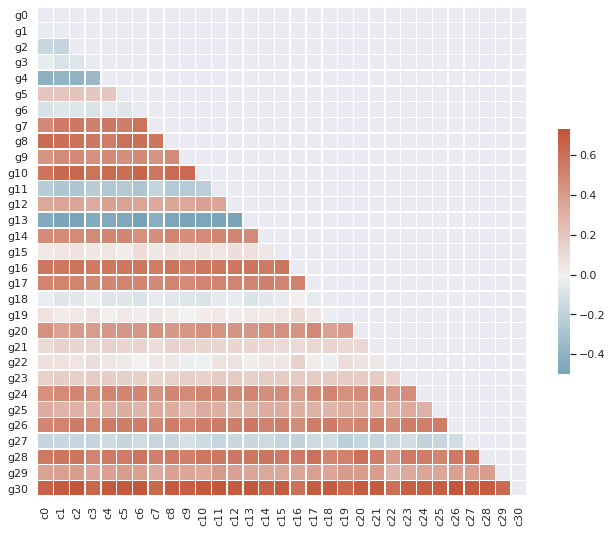

In [ ]:
corr = corr_gc.loc['g0':'g30','c0':'c30']
f, ax = plt.subplots(figsize=(11, 9))
cmap = sns.diverging_palette(230, 20, as_cmap=True)
sns.heatmap(corr, mask=mask, cmap=cmap, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

print('Gráfico 2.3: Matriz de correlação diagonal colunas g e c.')
plt.show()

Os tipos celulares influenciam na sobrevivência do organismo e estão correlacionados, ou seja, se um tipo celular for afetado ou não provavelmente os demais também terão os mesmo compotamento, como mostra o gráfico 2.2.

A alta ou baixa correlação não implica necessariamente na causalidade do evento. É preciso analisar outros fatores para se chegar a uma conlcusão sobre a causalidade.

Para os *dados resultados* (tabela 1.2) foram feitas as seguintes 
análises:

In [ ]:
# Quais culturas de célula foram ativadas, ou não, de acordo com cada mecanismo de ação (moa)?

dados_resultados['n_moa'] = dados_resultados.drop('id', axis=1).sum(axis=1)
dados_resultados['ativo_moa'] = (dados_resultados['n_moa'] != 0)

print('Quais culturas de célula (id) foram ativadas ou não:')
print(dados_resultados['ativo_moa'].head()) 
print('Quantas vezes cada cultura de célula foi ativada:')
print(dados_resultados['n_moa'].head())
print('Legenda: True -- ativou; False -- não ativou')

Quais culturas de célula (id) foram ativadas ou não:
0     True
1    False
2     True
3    False
4     True
Name: ativo_moa, dtype: bool
Quantas vezes cada cultura de célula foi ativada:
0    1
1    0
2    3
3    0
4    1
Name: n_moa, dtype: int64
Legenda: True -- ativou; False -- não ativou


Com isso é possível adicionar estas duas novas colunas a tabela de dados resultados (tabela 1.2).

In [ ]:
dados_resultados['ativo_moa'] = (dados_resultados['n_moa'] != 0)

print('Tabela 4: Dados resultados com as colunas ativo_moa e n_moa.')
dados_resultados

Tabela 4: Dados resultados com as colunas ativo_moa e n_moa.


,id,5-alpha_reductase_inhibitor,11-beta-hsd1_inhibitor,acat_inhibitor,acetylcholine_receptor_agonist,acetylcholine_receptor_antagonist,acetylcholinesterase_inhibitor,adenosine_receptor_agonist,adenosine_receptor_antagonist,adenylyl_cyclase_activator,adrenergic_receptor_agonist,adrenergic_receptor_antagonist,akt_inhibitor,aldehyde_dehydrogenase_inhibitor,alk_inhibitor,ampk_activator,analgesic,androgen_receptor_agonist,androgen_receptor_antagonist,anesthetic_-_local,angiogenesis_inhibitor,angiotensin_receptor_antagonist,anti-inflammatory,antiarrhythmic,antibiotic,anticonvulsant,antifungal,antihistamine,antimalarial,antioxidant,antiprotozoal,antiviral,apoptosis_stimulant,aromatase_inhibitor,atm_kinase_inhibitor,atp-sensitive_potassium_channel_antagonist,atp_synthase_inhibitor,atpase_inhibitor,atr_kinase_inhibitor,aurora_kinase_inhibitor,...,radiopaque_medium,raf_inhibitor,ras_gtpase_inhibitor,retinoid_receptor_agonist,retinoid_receptor_antagonist,rho_associated_kinase_inhibitor,ribonucleoside_reductase_inhibitor,rna_polymerase_inhibitor,serotonin_receptor_agonist,serotonin_receptor_antagonist,serotonin_reuptake_inhibitor,sigma_receptor_agonist,sigma_receptor_antagonist,smoothened_receptor_antagonist,sodium_channel_inhibitor,sphingosine_receptor_agonist,src_inhibitor,steroid,syk_inhibitor,tachykinin_antagonist,tgf-beta_receptor_inhibitor,thrombin_inhibitor,thymidylate_synthase_inhibitor,tlr_agonist,tlr_antagonist,tnf_inhibitor,topoisomerase_inhibitor,transient_receptor_potential_channel_antagonist,tropomyosin_receptor_kinase_inhibitor,trpv_agonist,trpv_antagonist,tubulin_inhibitor,tyrosine_kinase_inhibitor,ubiquitin_specific_protease_inhibitor,vegfr_inhibitor,vitamin_b,vitamin_d_receptor_agonist,wnt_inhibitor,n_moa,ativo_moa
0,id_000644bb2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,True
1,id_000779bfc,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,False
2,id_000a6266a,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3,True
3,id_0015fd391,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,False
4,id_001626bd3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23809,id_fffb1ceed,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,True
23810,id_fffb70c0c,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,True
23811,id_fffc1c3f4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,False
23812,id_fffcb9e7c,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,True


In [ ]:
# Qual o moa mais ativo para toda a base de dados?

contagem_moa = dados_resultados.select_dtypes('int64').drop('n_moa', axis=1).sum().sort_values(ascending=False)
#                                                                                                |resultado em ordem decrescente
print('20 moa`s mais ativos:')
contagem_moa.head(20)

20 moa`s mais ativos:


nfkb_inhibitor                       832
proteasome_inhibitor                 726
cyclooxygenase_inhibitor             435
dopamine_receptor_antagonist         424
serotonin_receptor_antagonist        404
dna_inhibitor                        402
glutamate_receptor_antagonist        367
adrenergic_receptor_antagonist       360
cdk_inhibitor                        340
egfr_inhibitor                       336
tubulin_inhibitor                    316
acetylcholine_receptor_antagonist    301
pdgfr_inhibitor                      297
hmgcr_inhibitor                      283
calcium_channel_blocker              281
flt3_inhibitor                       279
kit_inhibitor                        273
adrenergic_receptor_agonist          270
sodium_channel_inhibitor             267
glucocorticoid_receptor_agonist      266
dtype: int64

Como mostra o resultado acima, o maior ativador foi o *nfkb_inhibitor* que tem a interação inibidora, porém existem outros tipos de moa com resultados relavantes também e que podem ser muito importantes para futuros experimentos.

Portanto, estes dados foram analisados separadamente.

In [ ]:
# Inibidores

print('Moa`s inibidores mais ativos:')
contagem_moa.filter(like='inhibitor').head(5)

Moa`s inibidores mais ativos:


nfkb_inhibitor              832
proteasome_inhibitor        726
cyclooxygenase_inhibitor    435
dna_inhibitor               402
cdk_inhibitor               340
dtype: int64

In [ ]:
# Receptores antagonistas

print('Moa`s receptores antagonistas mais ativos:')
contagem_moa.filter(like='antagonist').head(5)

Moa`s receptores antagonistas mais ativos:


dopamine_receptor_antagonist         424
serotonin_receptor_antagonist        404
glutamate_receptor_antagonist        367
adrenergic_receptor_antagonist       360
acetylcholine_receptor_antagonist    301
dtype: int64

In [ ]:
# Receptores agonistas

print('Moa`s receptores agonistas mais ativos:')
contagem_moa.filter(like='_agonist').head(5)

Moa`s receptores agonistas mais ativos:


adrenergic_receptor_agonist        270
glucocorticoid_receptor_agonist    266
serotonin_receptor_agonist         236
acetylcholine_receptor_agonist     190
estrogen_receptor_agonist          158
dtype: int64

In [ ]:
# Bloqueadores

print('Moa`s bloqueadores mais ativos')
contagem_moa.filter(like='blocker').head(5)

Moa`s bloqueadores mais ativos


calcium_channel_blocker     281
chloride_channel_blocker     42
dtype: int64

Como visto anteriormente, gráfico 1, o composto *cacb2b860* é o de maior frequência nesta base de dados e também o único composto utilizado no tratamento *com_controle*, como discutido durante as aulas, portanto não pode ativar nenhum moa. Para verificar esta afirmação foi utilizado o código a seguir.

In [ ]:
# Primeiramente é preciso combinar os dados das duas tabelas de base de dados (1.1 e 1.2).
#Para isso foi utilizado o comando merge():

dados_combinados = pd.merge(dados, dados_resultados[['id', 'n_moa', 'ativo_moa']], on='id')
#                                                                                   |Chave primária

print('Tabela 1.3: Dados combinados.')
dados_combinados

Tabela 1.3: Dados combinados.


,id,tratamento,tempo,dose,composto,g0,g1,g2,g3,g4,g5,g6,g7,g8,g9,g10,g11,g12,g13,g14,g15,g16,g17,g18,g19,g20,g21,g22,g23,g24,g25,g26,g27,g28,g29,g30,g31,g32,g33,g34,...,c62,c63,c64,c65,c66,c67,c68,c69,c70,c71,c72,c73,c74,c75,c76,c77,c78,c79,c80,c81,c82,c83,c84,c85,c86,c87,c88,c89,c90,c91,c92,c93,c94,c95,c96,c97,c98,c99,n_moa,ativo_moa
0,id_000644bb2,com_droga,24,D1,b68db1d53,1.0620,0.5577,-0.2479,-0.6208,-0.1944,-1.0120,-1.0220,-0.0326,0.5548,-0.0921,1.1830,0.1530,0.5574,-0.4015,0.1789,-0.6528,-0.7969,0.6342,0.1778,-0.3694,-0.5688,-1.1360,-1.1880,0.6940,0.4393,0.2664,0.1907,0.1628,-0.2853,0.5819,0.2934,-0.5584,-0.0916,-0.3010,-0.1537,...,0.3680,0.8427,0.1042,0.1403,0.1758,1.2570,-0.5979,1.2250,-0.0553,0.7351,0.5810,0.9590,0.2427,0.0495,0.4141,0.8432,0.6162,-0.7318,1.2120,0.6362,-0.4427,0.1288,1.4840,0.1799,0.5367,-0.1111,-1.0120,0.6685,0.2862,0.2584,0.8076,0.5523,-0.1912,0.6584,-0.3981,0.2139,0.3801,0.4176,1,True
1,id_000779bfc,com_droga,72,D1,df89a8e5a,0.0743,0.4087,0.2991,0.0604,1.0190,0.5207,0.2341,0.3372,-0.4047,0.8507,-1.1520,-0.4201,-0.0958,0.4590,0.0803,0.2250,0.5293,0.2839,-0.3494,0.2883,0.9449,-0.1646,-0.2657,-0.3372,0.3135,-0.4316,0.4773,0.2075,-0.4216,-0.1161,-0.0499,-0.2627,0.9959,-0.2483,0.2655,...,0.3905,0.7099,0.2912,0.4151,-0.2840,-0.3104,-0.6373,0.2887,-0.0765,0.2539,0.4443,0.5932,0.2031,0.7639,0.5499,-0.3322,-0.0977,0.4329,-0.2782,0.7827,0.5934,0.3402,0.1499,0.4420,0.9366,0.8193,-0.4236,0.3192,-0.4265,0.7543,0.4708,0.0230,0.2957,0.4899,0.1522,0.1241,0.6077,0.7371,0,False
2,id_000a6266a,com_droga,48,D1,18bb41b2c,0.6280,0.5817,1.5540,-0.0764,-0.0323,1.2390,0.1715,0.2155,0.0065,1.2300,-0.4797,-0.5631,-0.0366,-1.8300,0.6057,-0.3278,0.6042,-0.3075,-0.1147,-0.0570,-0.0799,-0.8181,-1.5320,0.2307,0.4901,0.4780,-1.3970,4.6240,-0.0437,1.2870,-1.8530,0.6069,0.4290,0.1783,0.0018,...,-0.0444,0.1894,-0.0014,-2.3640,-0.4682,0.1210,-0.5177,-0.0604,0.1682,-0.4436,0.4963,0.1363,0.3335,0.9760,-0.0427,-0.1235,0.0959,0.0690,-0.9416,-0.7548,-0.1109,-0.6272,0.3019,0.1172,0.1093,-0.3113,0.3019,-0.0873,-0.7250,-0.6297,0.6103,0.0223,-1.3240,-0.3174,-0.6417,-0.2187,-1.4080,0.6931,3,True
3,id_0015fd391,com_droga,48,D1,8c7f86626,-0.5138,-0.2491,-0.2656,0.5288,4.0620,-0.8095,-1.9590,0.1792,-0.1321,-1.0600,-0.8269,-0.3584,-0.8511,-0.5844,-2.5690,0.8183,-0.0532,-0.8554,0.1160,-2.3520,2.1200,-1.1580,-0.7191,-0.8004,-1.4670,-0.0107,-0.8995,0.2406,-0.2479,-1.0890,-0.7575,0.0881,-2.7370,0.8745,0.5787,...,-2.3820,-3.7350,-2.9740,-1.4930,-1.6600,-3.1660,0.2816,-0.2990,-1.1870,-0.5044,-1.7750,-1.6120,-0.9215,-1.0810,-3.0520,-3.4470,-2.7740,-1.8460,-0.5568,-3.3960,-2.9510,-1.1550,-3.2620,-1.5390,-2.4600,-0.9417,-1.5550,0.2431,-2.0990,-0.6441,-5.6300,-1.3780,-0.8632,-1.2880,-1.6210,-0.8784,-0.3876,-0.8154,0,False
4,id_001626bd3,com_droga,72,D2,7cbed3131,-0.3254,-0.4009,0.9700,0.6919,1.4180,-0.8244,-0.2800,-0.1498,-0.8789,0.8630,-0.2219,-0.5121,-0.9577,1.1750,0.2042,0.1970,0.1244,-1.7090,-0.3543,-0.5160,-0.3330,-0.2685,0.7649,0.2057,1.3720,0.6835,0.8056,-0.3754,-1.2090,0.2965,-0.0712,0.6389,0.6674,-0.0783,1.1740,...,0.1535,-0.4640,-0.5943,0.3973,0.1500,0.5178,0.5159,0.6091,0.1813,-0.4249,0.7832,0.6529,0.5648,0.4817,0.0587,0.5303,0.6376,-0.3966,-1.4950,-0.9625,-0.0541,0.6273,0.4563,0.0698,0.8134,0.1924,0.6054,-0.1824,0.0042,0.0048,0.6670,1.0690,0.5523,-0.3031,0.1094,0.2885,-0.3786,0.7125,1,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23809,id_fffb1ceed,com_droga,24,D2,df1d0a5a1,0.1394,-0.0636,-0.1112,-0.5080,-0.4713,0.7201,0.5773,0.3055,-0.4726,0.1269,0.2531,0.1730,-0.4532,-1.0790,0.2474,-0.4550,0.3588,0.1600,-0.7362,-0.1103,0.8550,-0.4139,0.5541,0.2310,-0.5573,-0.4397,-0.9260,-0.2424,-0.6686,0.2326,0.6456,0.0136,-0.5141,-0.6320,0.7166,...,-0.0895,0.4420,0.9641,-0.1846

In [ ]:
# Para saber se todos os moa's do tratamento com_controle deram 0/Falso:

print('moa`s ativos para tratamento com_controle? ' , dados_combinados.query('tratamento == "com_controle"')['ativo_moa'].value_counts())
print(dados_combinados.query('tratamento == "com_controle"'))

moa`s ativos para tratamento com_controle?  False    1866
Name: ativo_moa, dtype: int64
                 id    tratamento  tempo dose  ...     c98     c99  n_moa  ativo_moa
25     id_0054388ec  com_controle     48   D1  ...  0.8976  1.0050      0      False
38     id_0079af0fb  com_controle     24   D1  ...  0.6498 -1.4820      0      False
40     id_007bfbb91  com_controle     24   D2  ...  0.8543  0.9180      0      False
47     id_008a986b7  com_controle     48   D2  ... -0.9245 -0.9367      0      False
63     id_009d8340f  com_controle     24   D2  ... -0.4326  0.9364      0      False
...             ...           ...    ...  ...  ...     ...     ...    ...        ...
23729  id_ff1f9e5fc  com_controle     24   D1  ... -0.2422  0.0457      0      False
23747  id_ff469c482  com_controle     72   D1  ... -0.0742 -0.6777      0      False
23768  id_ff89331ca  com_controle     72   D2  ... -0.1748 -0.3626      0      False
23793  id_ffd26f361  com_controle     48   D2  ... -0.5272  0.

Com estes resultados também se comprova que somente o composto *cacb2b860* é utilizado no tratamento *com_controle*, pois a quantidade de de moa's que não foram ativos é igual a quantidade total de vezes que este composto aparece na base de dados: 1866.

Com esta mesma lógica, é possível saber quais compostos (tratamento com_droga) não tiveram moa ativo. Como mostra os resultados abaixo.

In [ ]:
print(dados_combinados.query('tratamento == "com_droga"'))
print('Efeito do tratamento com_droga:')
print(dados_combinados.query('tratamento == "com_droga"')['ativo_moa'].value_counts())

                 id tratamento  tempo dose  ...     c98     c99  n_moa  ativo_moa
0      id_000644bb2  com_droga     24   D1  ...  0.3801  0.4176      1       True
1      id_000779bfc  com_droga     72   D1  ...  0.6077  0.7371      0      False
2      id_000a6266a  com_droga     48   D1  ... -1.4080  0.6931      3       True
3      id_0015fd391  com_droga     48   D1  ... -0.3876 -0.8154      0      False
4      id_001626bd3  com_droga     72   D2  ... -0.3786  0.7125      1       True
...             ...        ...    ...  ...  ...     ...     ...    ...        ...
23808  id_fff8c2444  com_droga     72   D1  ... -0.4259  0.2434      1       True
23809  id_fffb1ceed  com_droga     24   D2  ...  0.5258  0.4680      1       True
23810  id_fffb70c0c  com_droga     24   D2  ... -0.2715  0.3689      1       True
23812  id_fffcb9e7c  com_droga     24   D1  ... -0.6290  0.0740      1       True
23813  id_ffffdd77b  com_droga     72   D1  ... -2.1500 -4.2520      0      False

[21948 rows x 8

Com isso, é possível fazer uma análise mais detalhada para cada gene ou tipo celular individualmente de acordo com o interesse, como mostra o exemplo a seguir.

Boxplot 2.1: Moa para tratamento no g0.


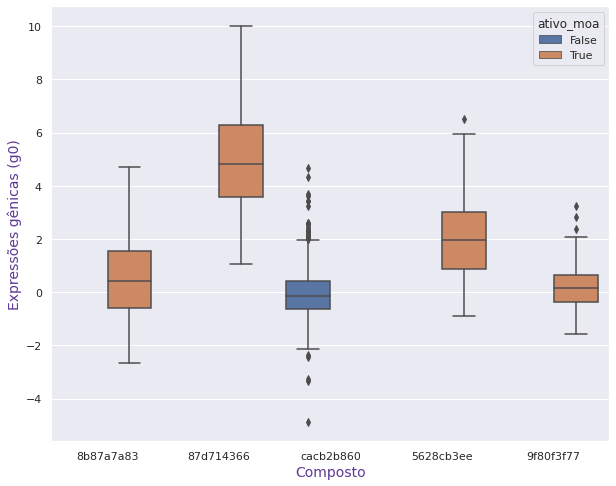

In [ ]:
plt.figure(figsize=(10,8))
compostos_principais = dados_combinados['composto'].value_counts().index[:5]
ax = sns.boxplot(data=dados_combinados.query('composto in @compostos_principais'), y='g0', x='composto', hue='ativo_moa')

ax.set_xlabel('Composto', fontsize=14, color='#5f3796')
ax.set_ylabel('Expressões gênicas (g0)', fontsize=14, color='#5f3796')

print('Boxplot 2.1: Moa para tratamento no g0.')
plt.show()

Como mostra o boxplot 2.1, o composto *9f80f3f77* é semelhante ao composto *cacb2b860* (com ativo_moa: False), utilizado pra tratamento *com_controle*, que pode ser um indicativo de que é um composto com efeito não muito considerável. O resultado *True* (mecanismo de ação ativado) pode ocorrer devido a linhagem celular deste gene (g0), ou seja, pode ter relação com o resultado de outros genes.

Podemos verificar também se algum composto, no tratamento *com_composto* ativou algum moa dependendo da condição do experimento (tempo, dose) ou não.

In [ ]:
#variáveis
composto_ativa = dados_combinados.query('ativo_moa == True')
composto_nao_ativa = dados_combinados.query('ativo_moa == False')

#merge como primary key
composto_ativa_nao_ativa = pd.merge(composto_ativa, composto_nao_ativa, on=['composto'], how='outer', indicator=True)

composto_ativa_nao_ativa['_merge'].value_counts()

left_only     14447
right_only     9367
both              0
Name: _merge, dtype: int64

Como mostra o resultado para ambos os casos, ou seja, quando o moa é ativo (*True*) e não ativo (*False*) para alguma condição experimental (tempo, dose) não é encontrado nenhum dado na tabela (both: 0). Portanto, nehnum composto ativa ou desativa o moa dependendo da condição experimental.

Esta análise também pode ser feita individualmente, para cada gene ou tipo celular, dependendo do que está sendo estudado. Como mostra o exemplo abaixo:



Boxplot 2.2: Comparativo de tempo.


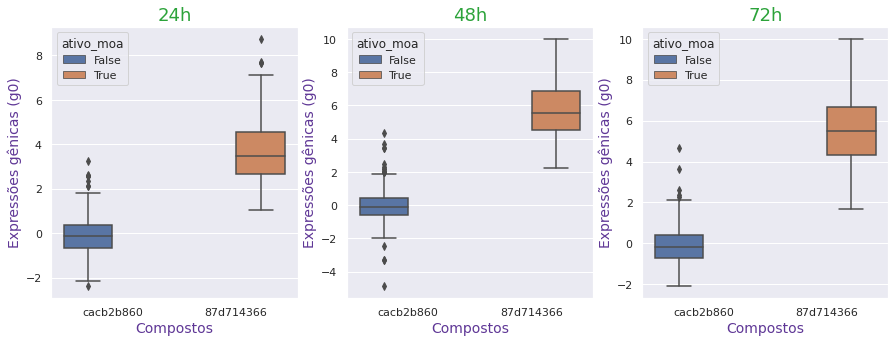

In [ ]:
# Boxplots para tempo

# Preparação dos dados:
compostos_principais = dados_combinados['composto'].value_counts().index[0:2]

fig, (ax1, ax2, ax3) = plt.subplots(1,3,figsize=(15,5))
sns.boxplot(data = dados_combinados.query('composto in @compostos_principais & tempo == 24'), y= 'g0', x='composto',
            hue='ativo_moa', order=compostos_principais, ax=ax1)
sns.boxplot(data = dados_combinados.query('composto in @compostos_principais & tempo == 48'), y= 'g0', x='composto',
            hue='ativo_moa', order=compostos_principais, ax=ax2)
sns.boxplot(data = dados_combinados.query('composto in @compostos_principais & tempo == 72'), y= 'g0', x='composto',
            hue='ativo_moa', order=compostos_principais, ax=ax3)

ax1.set_title('24h', fontsize=18, color='#2ca33a')
ax1.set_xlabel('Compostos', fontsize=14, color='#5f3796')
ax1.set_ylabel('Expressões gênicas (g0)', fontsize=14, color='#5f3796')

ax2.set_title('48h', fontsize=18, color='#2ca33a')
ax2.set_xlabel('Compostos', fontsize=14, color='#5f3796')
ax2.set_ylabel('Expressões gênicas (g0)', fontsize=14, color='#5f3796')

ax3.set_title('72h', fontsize=18, color='#2ca33a')
ax3.set_xlabel('Compostos', fontsize=14, color='#5f3796')
ax3.set_ylabel('Expressões gênicas (g0)', fontsize=14, color='#5f3796')

print('Boxplot 2.2: Comparativo de tempo.')
plt.show()

Boxplot 2.3: Comparativo das dosagens.


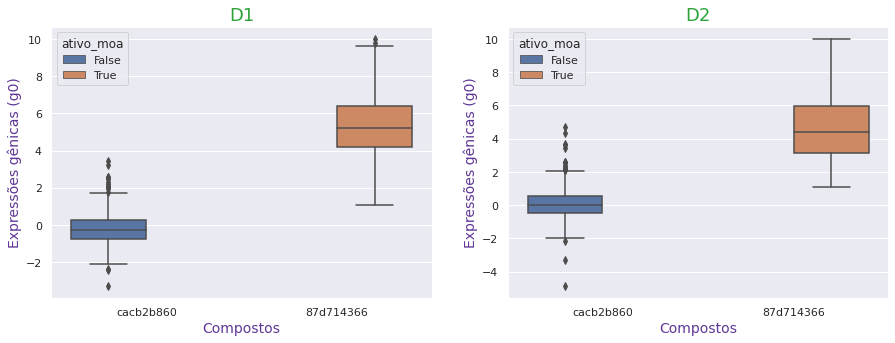

In [ ]:
# Boxplots para dose

fig, (ax1, ax2) = plt.subplots(1,2,figsize=(15,5))
sns.boxplot(data = dados_combinados.query('composto in @compostos_principais & dose == "D1"'), y= 'g0', x='composto',
            hue='ativo_moa', order=compostos_principais, ax=ax1)
sns.boxplot(data = dados_combinados.query('composto in @compostos_principais & dose == "D2"'), y= 'g0', x='composto',
            hue='ativo_moa', order=compostos_principais, ax=ax2)

ax1.set_title('D1', fontsize=18, color='#2ca33a')
ax1.set_xlabel('Compostos', fontsize=14, color='#5f3796')
ax1.set_ylabel('Expressões gênicas (g0)', fontsize=14, color='#5f3796')

ax2.set_title('D2', fontsize=18, color='#2ca33a')
ax2.set_xlabel('Compostos', fontsize=14, color='#5f3796')
ax2.set_ylabel('Expressões gênicas (g0)', fontsize=14, color='#5f3796')

print('Boxplot 2.3: Comparativo das dosagens.')
plt.show()

# **Machine Learning**
---

A fonte de apredizado do modelo de ML utilizado para este projeto é a nova base de *dados_combinados* criada anteriormente (tabela 1.3), que fará uma classificação de quais moa's foram ativados ou não e qual composto responsável pela ativação, portanto, cada experimento (referente ao *id*) terá um assinatura que servirá de base para a previsão de novos compostos que poderão ser adicionados à esta base de dados.

In [ ]:
print('Tabela 1.3: Dados combinados.')
dados_combinados

Tabela 1.3: Dados combinados.


,id,tratamento,tempo,dose,composto,g0,g1,g2,g3,g4,g5,g6,g7,g8,g9,g10,g11,g12,g13,g14,g15,g16,g17,g18,g19,g20,g21,g22,g23,g24,g25,g26,g27,g28,g29,g30,g31,g32,g33,g34,...,c62,c63,c64,c65,c66,c67,c68,c69,c70,c71,c72,c73,c74,c75,c76,c77,c78,c79,c80,c81,c82,c83,c84,c85,c86,c87,c88,c89,c90,c91,c92,c93,c94,c95,c96,c97,c98,c99,n_moa,ativo_moa
0,id_000644bb2,com_droga,24,D1,b68db1d53,1.0620,0.5577,-0.2479,-0.6208,-0.1944,-1.0120,-1.0220,-0.0326,0.5548,-0.0921,1.1830,0.1530,0.5574,-0.4015,0.1789,-0.6528,-0.7969,0.6342,0.1778,-0.3694,-0.5688,-1.1360,-1.1880,0.6940,0.4393,0.2664,0.1907,0.1628,-0.2853,0.5819,0.2934,-0.5584,-0.0916,-0.3010,-0.1537,...,0.3680,0.8427,0.1042,0.1403,0.1758,1.2570,-0.5979,1.2250,-0.0553,0.7351,0.5810,0.9590,0.2427,0.0495,0.4141,0.8432,0.6162,-0.7318,1.2120,0.6362,-0.4427,0.1288,1.4840,0.1799,0.5367,-0.1111,-1.0120,0.6685,0.2862,0.2584,0.8076,0.5523,-0.1912,0.6584,-0.3981,0.2139,0.3801,0.4176,1,True
1,id_000779bfc,com_droga,72,D1,df89a8e5a,0.0743,0.4087,0.2991,0.0604,1.0190,0.5207,0.2341,0.3372,-0.4047,0.8507,-1.1520,-0.4201,-0.0958,0.4590,0.0803,0.2250,0.5293,0.2839,-0.3494,0.2883,0.9449,-0.1646,-0.2657,-0.3372,0.3135,-0.4316,0.4773,0.2075,-0.4216,-0.1161,-0.0499,-0.2627,0.9959,-0.2483,0.2655,...,0.3905,0.7099,0.2912,0.4151,-0.2840,-0.3104,-0.6373,0.2887,-0.0765,0.2539,0.4443,0.5932,0.2031,0.7639,0.5499,-0.3322,-0.0977,0.4329,-0.2782,0.7827,0.5934,0.3402,0.1499,0.4420,0.9366,0.8193,-0.4236,0.3192,-0.4265,0.7543,0.4708,0.0230,0.2957,0.4899,0.1522,0.1241,0.6077,0.7371,0,False
2,id_000a6266a,com_droga,48,D1,18bb41b2c,0.6280,0.5817,1.5540,-0.0764,-0.0323,1.2390,0.1715,0.2155,0.0065,1.2300,-0.4797,-0.5631,-0.0366,-1.8300,0.6057,-0.3278,0.6042,-0.3075,-0.1147,-0.0570,-0.0799,-0.8181,-1.5320,0.2307,0.4901,0.4780,-1.3970,4.6240,-0.0437,1.2870,-1.8530,0.6069,0.4290,0.1783,0.0018,...,-0.0444,0.1894,-0.0014,-2.3640,-0.4682,0.1210,-0.5177,-0.0604,0.1682,-0.4436,0.4963,0.1363,0.3335,0.9760,-0.0427,-0.1235,0.0959,0.0690,-0.9416,-0.7548,-0.1109,-0.6272,0.3019,0.1172,0.1093,-0.3113,0.3019,-0.0873,-0.7250,-0.6297,0.6103,0.0223,-1.3240,-0.3174,-0.6417,-0.2187,-1.4080,0.6931,3,True
3,id_0015fd391,com_droga,48,D1,8c7f86626,-0.5138,-0.2491,-0.2656,0.5288,4.0620,-0.8095,-1.9590,0.1792,-0.1321,-1.0600,-0.8269,-0.3584,-0.8511,-0.5844,-2.5690,0.8183,-0.0532,-0.8554,0.1160,-2.3520,2.1200,-1.1580,-0.7191,-0.8004,-1.4670,-0.0107,-0.8995,0.2406,-0.2479,-1.0890,-0.7575,0.0881,-2.7370,0.8745,0.5787,...,-2.3820,-3.7350,-2.9740,-1.4930,-1.6600,-3.1660,0.2816,-0.2990,-1.1870,-0.5044,-1.7750,-1.6120,-0.9215,-1.0810,-3.0520,-3.4470,-2.7740,-1.8460,-0.5568,-3.3960,-2.9510,-1.1550,-3.2620,-1.5390,-2.4600,-0.9417,-1.5550,0.2431,-2.0990,-0.6441,-5.6300,-1.3780,-0.8632,-1.2880,-1.6210,-0.8784,-0.3876,-0.8154,0,False
4,id_001626bd3,com_droga,72,D2,7cbed3131,-0.3254,-0.4009,0.9700,0.6919,1.4180,-0.8244,-0.2800,-0.1498,-0.8789,0.8630,-0.2219,-0.5121,-0.9577,1.1750,0.2042,0.1970,0.1244,-1.7090,-0.3543,-0.5160,-0.3330,-0.2685,0.7649,0.2057,1.3720,0.6835,0.8056,-0.3754,-1.2090,0.2965,-0.0712,0.6389,0.6674,-0.0783,1.1740,...,0.1535,-0.4640,-0.5943,0.3973,0.1500,0.5178,0.5159,0.6091,0.1813,-0.4249,0.7832,0.6529,0.5648,0.4817,0.0587,0.5303,0.6376,-0.3966,-1.4950,-0.9625,-0.0541,0.6273,0.4563,0.0698,0.8134,0.1924,0.6054,-0.1824,0.0042,0.0048,0.6670,1.0690,0.5523,-0.3031,0.1094,0.2885,-0.3786,0.7125,1,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23809,id_fffb1ceed,com_droga,24,D2,df1d0a5a1,0.1394,-0.0636,-0.1112,-0.5080,-0.4713,0.7201,0.5773,0.3055,-0.4726,0.1269,0.2531,0.1730,-0.4532,-1.0790,0.2474,-0.4550,0.3588,0.1600,-0.7362,-0.1103,0.8550,-0.4139,0.5541,0.2310,-0.5573,-0.4397,-0.9260,-0.2424,-0.6686,0.2326,0.6456,0.0136,-0.5141,-0.6320,0.7166,...,-0.0895,0.4420,0.9641,-0.1846

Utilizamos o modelo de ***Regressão Logística*** da biblioteca **Scikit-Learn**. Foram utilizados 20% da base de *dados_combinados* como base de teste sendo `y` o *ativo_moa* em função de `x` (dados_combindados), ou seja, `y` é definido a partir das colunas *g* e *c*.

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

#variáveis
x = dados_combinados.select_dtypes('float64')
y = dados_combinados['ativo_moa']

#base de treino
x_treino, x_test, y_treino, y_test = train_test_split(x, y, test_size=0.2, stratify=y, random_state=376)
#                                                                 |% de dados utilizada para teste

print('Resultado do teste:')
modelo_rlogistica = LogisticRegression(max_iter=1000)
modelo_rlogistica.fit(x_treino, y_treino)
modelo_rlogistica.score(x_test, y_test)

Resultado do teste:


0.6267058576527399

O resultado do teste indica que a acurácia deste modelo é de 62,67%, ou seja, aproximadamente 63% dos novos compostos adicionados terão os dados de moa correspondentes a realidade.

Para este e os demais modelos de previsão  de ativação de moa discutidos durante a aula as porcentagens de acurácia tiverem valores bem próximos, em torno de 60%, pois são modelos bem básicos. Porém para este tipo dado é necessário uma acurácia bem maior, já que se trata de dados experimentais que interferem diretamente na saúde e segurança de vida de pessoas.

# **Conclusão**
---


Neste projeto se ressalta a impostância da Ciência de Dados atualmente, observamos que é possível saber quais tipos de tratamentos foram utilizados em determinado experimento, a frequência/proporção com que determidado(s) dado(s) se repetem e selecionar o(s) dado(s) desejado(s), qual o melhor gráfico pra representar determinado conjunto de dados para uma quantidade imensa de dados, de resultados experimentais em um intervalo de tempo bem pequeno. Também é possível observar a potencialidade desta ciência, destas anlálises que não somente trazem informações cruciais como também pode fazer previsões, como por exemplo a utilização de ferramentas de Machine Learning, dependendo da base de dados disponível.

# **Referências**
---

*   *Use Computer Vision to Capture Real-World Events. Disponível em: https://towardsdatascience.com/tagged/covid19. Acesso em 13/05/2021.*
*   *Como a ciência de dados vem ajudando na luta contra a COVID-19. Disponível em: https://www.criteo.com/br/blog/como-a-ciencia-de-dados-vem-ajudando-na-luta-contra-o-covid-19/. Acesso em 13/05/2021.*